In [163]:
import pandas as pd
import json
import sqlite3
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from bs4 import BeautifulSoup

## Ekstrak electricity_access_percent.csv

In [164]:
electricity = pd.read_csv("data_source/electricity_access_percent.csv", skiprows=4)
electricity

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,NaN,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,NaN,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,NaN,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,98.377060,0.000000,99.430435,99.773651,99.942505,99.993134,100.000000,100.000000,NaN,NaN
260,"Yemen, Rep.",YEM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,61.751400,63.134281,64.532181,65.942101,75.600000,66.100000,70.213905,71.642349,NaN,NaN
261,South Africa,ZAF,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.700000,82.900000,84.700000,85.300000,85.400000,86.000000,85.500000,84.200000,NaN,NaN
262,Zambia,ZMB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,23.235649,22.000000,24.328644,24.894667,25.469702,27.900000,31.100000,27.219337,NaN,NaN


In [165]:
data_electricity_check_missing = electricity.isnull().sum()

print("Mengecek data yang hilang\n")
print(data_electricity_check_missing)


Mengecek data yang hilang

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              264
                 ... 
2014                3
2015                3
2016                3
2017              264
Unnamed: 62       264
Length: 63, dtype: int64


In [166]:
electricity_cleaned = electricity.dropna(axis=1, how='all')

print("Setelah mengatasi data yang hilang\n")
print(electricity_cleaned)


Setelah mengatasi data yang hilang

     Country Name Country Code                           Indicator Name  \
0           Aruba          ABW  Access to electricity (% of population)   
1     Afghanistan          AFG  Access to electricity (% of population)   
2          Angola          AGO  Access to electricity (% of population)   
3         Albania          ALB  Access to electricity (% of population)   
4         Andorra          AND  Access to electricity (% of population)   
..            ...          ...                                      ...   
259        Kosovo          XKX  Access to electricity (% of population)   
260   Yemen, Rep.          YEM  Access to electricity (% of population)   
261  South Africa          ZAF  Access to electricity (% of population)   
262        Zambia          ZMB  Access to electricity (% of population)   
263      Zimbabwe          ZWE  Access to electricity (% of population)   

     Indicator Code        1990        1991        1992        

In [167]:
data_electricity_duplicate = electricity_cleaned.drop_duplicates()

print("Setelah menghapus duplikasi\n")
print(data_electricity_duplicate)


Setelah menghapus duplikasi

     Country Name Country Code                           Indicator Name  \
0           Aruba          ABW  Access to electricity (% of population)   
1     Afghanistan          AFG  Access to electricity (% of population)   
2          Angola          AGO  Access to electricity (% of population)   
3         Albania          ALB  Access to electricity (% of population)   
4         Andorra          AND  Access to electricity (% of population)   
..            ...          ...                                      ...   
259        Kosovo          XKX  Access to electricity (% of population)   
260   Yemen, Rep.          YEM  Access to electricity (% of population)   
261  South Africa          ZAF  Access to electricity (% of population)   
262        Zambia          ZMB  Access to electricity (% of population)   
263      Zimbabwe          ZWE  Access to electricity (% of population)   

     Indicator Code        1990        1991        1992        1993  \

In [168]:
data_electricity_duplicate.to_csv('data_clean/clean_electricity_access_percent.csv', index=False)

## Ekstrak population_data.csv

In [169]:
population_csv = pd.read_csv("data_source/population_data.csv", skiprows=4)
population_csv

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0,NaN
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0,NaN
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0,NaN
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0,NaN


In [170]:
population_csv[['Indicator Name']] = population_csv[['Indicator Name']].replace({',' : ''}, regex=True)

In [171]:
population_check_missing = population_csv.isnull().sum()

print("Mengecek data yang hilang\n")
print(population_check_missing)

Mengecek data yang hilang

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                4
                 ... 
2014                2
2015                2
2016                2
2017                2
Unnamed: 62       264
Length: 63, dtype: int64


In [172]:
population_cleaned = population_csv.dropna(axis=1, how='all')

print("Setelah mengatasi data yang hilang\n")
print(population_cleaned)

Setelah mengatasi data yang hilang

     Country Name Country Code    Indicator Name Indicator Code        1960  \
0           Aruba          ABW  Population total    SP.POP.TOTL     54211.0   
1     Afghanistan          AFG  Population total    SP.POP.TOTL   8996351.0   
2          Angola          AGO  Population total    SP.POP.TOTL   5643182.0   
3         Albania          ALB  Population total    SP.POP.TOTL   1608800.0   
4         Andorra          AND  Population total    SP.POP.TOTL     13411.0   
..            ...          ...               ...            ...         ...   
259        Kosovo          XKX  Population total    SP.POP.TOTL    947000.0   
260   Yemen, Rep.          YEM  Population total    SP.POP.TOTL   5172135.0   
261  South Africa          ZAF  Population total    SP.POP.TOTL  17456855.0   
262        Zambia          ZMB  Population total    SP.POP.TOTL   3044846.0   
263      Zimbabwe          ZWE  Population total    SP.POP.TOTL   3747369.0   

           1961

In [173]:
population_duplicate = population_cleaned.drop_duplicates()

print("DataFrame setelah menghapus duplikasi\n")
print(population_duplicate)


DataFrame setelah menghapus duplikasi

     Country Name Country Code    Indicator Name Indicator Code        1960  \
0           Aruba          ABW  Population total    SP.POP.TOTL     54211.0   
1     Afghanistan          AFG  Population total    SP.POP.TOTL   8996351.0   
2          Angola          AGO  Population total    SP.POP.TOTL   5643182.0   
3         Albania          ALB  Population total    SP.POP.TOTL   1608800.0   
4         Andorra          AND  Population total    SP.POP.TOTL     13411.0   
..            ...          ...               ...            ...         ...   
259        Kosovo          XKX  Population total    SP.POP.TOTL    947000.0   
260   Yemen, Rep.          YEM  Population total    SP.POP.TOTL   5172135.0   
261  South Africa          ZAF  Population total    SP.POP.TOTL  17456855.0   
262        Zambia          ZMB  Population total    SP.POP.TOTL   3044846.0   
263      Zimbabwe          ZWE  Population total    SP.POP.TOTL   3747369.0   

           1

In [174]:
population_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            260 non-null    float64
 5   1961            260 non-null    float64
 6   1962            260 non-null    float64
 7   1963            260 non-null    float64
 8   1964            260 non-null    float64
 9   1965            260 non-null    float64
 10  1966            260 non-null    float64
 11  1967            260 non-null    float64
 12  1968            260 non-null    float64
 13  1969            260 non-null    float64
 14  1970            260 non-null    float64
 15  1971            260 non-null    float64
 16  1972            260 non-null    float64
 17  1973            260 non-null    flo

In [175]:
population_duplicate = pd.melt(population_duplicate, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
             var_name='tahun', value_name='population')

population_duplicate

,Country Name,Country Code,Indicator Name,Indicator Code,tahun,population
0,Aruba,ABW,Population total,SP.POP.TOTL,1960,54211.0
1,Afghanistan,AFG,Population total,SP.POP.TOTL,1960,8996351.0
2,Angola,AGO,Population total,SP.POP.TOTL,1960,5643182.0
3,Albania,ALB,Population total,SP.POP.TOTL,1960,1608800.0
4,Andorra,AND,Population total,SP.POP.TOTL,1960,13411.0
...,...,...,...,...,...,...
15307,Kosovo,XKX,Population total,SP.POP.TOTL,2017,1830700.0
15308,"Yemen, Rep.",YEM,Population total,SP.POP.TOTL,2017,28250420.0
15309,South Africa,ZAF,Population total,SP.POP.TOTL,2017,56717156.0
15310,Zambia,ZMB,Population total,SP.POP.TOTL,2017,17094130.0


In [176]:
population_duplicate.to_csv('data_clean/clean_population_data.csv', index=False)

## Ektrak gdp_data.csv

In [177]:
gdp = pd.read_csv("data_source/gdp_data.csv", skiprows=4)
gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.653793e+09,5.829934e+09,6.686683e+09,6.500193e+09,7.073420e+09,7.386891e+09,6.439947e+09,6.715487e+09,7.128691e+09,NaN
260,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.513027e+10,3.090675e+10,3.272642e+10,3.540133e+10,4.041524e+10,4.322858e+10,3.460248e+10,1.821333e+10,NaN,NaN
261,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.972167e+11,3.752981e+11,4.168782e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.177410e+11,2.957627e+11,3.494193e+11,NaN
262,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.095475e+10,2.580867e+10,NaN


In [178]:
gdp_check_missing = gdp.isnull().sum()

print("Mengecek data yang hilang\n")
print(gdp_check_missing)

Mengecek data yang hilang

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2014               17
2015               18
2016               23
2017               30
Unnamed: 62       264
Length: 63, dtype: int64


In [179]:
gdp_cleaned = gdp.dropna(axis=1, how='all')
gdp_cleaned = gdp.fillna(0)

print("Setelah mengatasi data yang hilang\n")
print(gdp_cleaned)

Setelah mengatasi data yang hilang

     Country Name Country Code     Indicator Name  Indicator Code  \
0           Aruba          ABW  GDP (current US$)  NY.GDP.MKTP.CD   
1     Afghanistan          AFG  GDP (current US$)  NY.GDP.MKTP.CD   
2          Angola          AGO  GDP (current US$)  NY.GDP.MKTP.CD   
3         Albania          ALB  GDP (current US$)  NY.GDP.MKTP.CD   
4         Andorra          AND  GDP (current US$)  NY.GDP.MKTP.CD   
..            ...          ...                ...             ...   
259        Kosovo          XKX  GDP (current US$)  NY.GDP.MKTP.CD   
260   Yemen, Rep.          YEM  GDP (current US$)  NY.GDP.MKTP.CD   
261  South Africa          ZAF  GDP (current US$)  NY.GDP.MKTP.CD   
262        Zambia          ZMB  GDP (current US$)  NY.GDP.MKTP.CD   
263      Zimbabwe          ZWE  GDP (current US$)  NY.GDP.MKTP.CD   

             1960          1961          1962          1963          1964  \
0    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+0

In [180]:
gdp_duplicate = gdp_cleaned.drop_duplicates()

print("DataFrame setelah menghapus duplikasi\n")
print(gdp_duplicate)

DataFrame setelah menghapus duplikasi

     Country Name Country Code     Indicator Name  Indicator Code  \
0           Aruba          ABW  GDP (current US$)  NY.GDP.MKTP.CD   
1     Afghanistan          AFG  GDP (current US$)  NY.GDP.MKTP.CD   
2          Angola          AGO  GDP (current US$)  NY.GDP.MKTP.CD   
3         Albania          ALB  GDP (current US$)  NY.GDP.MKTP.CD   
4         Andorra          AND  GDP (current US$)  NY.GDP.MKTP.CD   
..            ...          ...                ...             ...   
259        Kosovo          XKX  GDP (current US$)  NY.GDP.MKTP.CD   
260   Yemen, Rep.          YEM  GDP (current US$)  NY.GDP.MKTP.CD   
261  South Africa          ZAF  GDP (current US$)  NY.GDP.MKTP.CD   
262        Zambia          ZMB  GDP (current US$)  NY.GDP.MKTP.CD   
263      Zimbabwe          ZWE  GDP (current US$)  NY.GDP.MKTP.CD   

             1960          1961          1962          1963          1964  \
0    0.000000e+00  0.000000e+00  0.000000e+00  0.000000

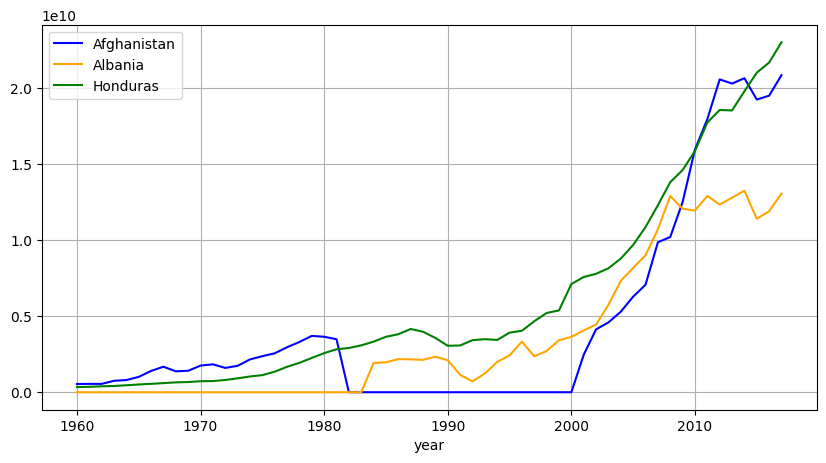

In [181]:
plt.figure(figsize=(10, 5))

# Mendapatkan nilai GDP untuk Afghanistan, Albania, dan Honduras
afghanistan_gdp = gdp_duplicate.loc[gdp_duplicate['Country Name'] == 'Afghanistan', '1960':'2017'].values.flatten()
albania_gdp = gdp_duplicate.loc[gdp_duplicate['Country Name'] == 'Albania', '1960':'2017'].values.flatten()
honduras_gdp = gdp_duplicate.loc[gdp_duplicate['Country Name'] == 'Honduras', '1960':'2017'].values.flatten()

plt.plot(range(1960, 2018), afghanistan_gdp, label="Afghanistan", color="blue")
plt.plot(range(1960, 2018), albania_gdp, label="Albania", color="orange")
plt.plot(range(1960, 2018), honduras_gdp, label="Honduras", color="green")
plt.xlabel("year")
plt.legend()
plt.grid(True)
plt.show()


In [182]:
gdp_duplicate.to_csv('data_clean/clean_gdp_data.csv', index=False)

## Ekstrak data rural_population_percent

In [183]:
rural = pd.read_csv("data_source/rural_population_percent.csv", skiprows=4)
rural

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Rural population (% of total population),SP.RUR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,Rural population (% of total population),SP.RUR.TOTL.ZS,90.900,90.541,90.169,89.784,89.386,88.974,...,68.835,68.268,67.698,67.126,66.550,65.973,65.394,64.813,64.231,NaN
261,South Africa,ZAF,Rural population (% of total population),SP.RUR.TOTL.ZS,53.381,53.207,53.094,52.980,52.866,52.752,...,38.313,37.782,37.254,36.728,36.212,35.702,35.199,34.705,34.218,NaN
262,Zambia,ZMB,Rural population (% of total population),SP.RUR.TOTL.ZS,81.855,81.049,80.215,79.288,77.985,76.628,...,61.701,61.275,60.847,60.413,59.973,59.528,59.078,58.621,58.160,NaN


In [184]:
rural_check_missing = rural.isnull().sum()

print("Mengecek data yang hilang\n")
rural_check_missing

Mengecek data yang hilang



Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                5
                 ... 
2014                4
2015                4
2016                4
2017                4
Unnamed: 62       264
Length: 63, dtype: int64

In [185]:
rural_missing = rural.dropna(axis=1, how='all')
rural_missing = rural.fillna(0)

print("Setelah mengatasi data yang hilang\n")
print(rural_missing)

Setelah mengatasi data yang hilang

     Country Name Country Code                            Indicator Name  \
0           Aruba          ABW  Rural population (% of total population)   
1     Afghanistan          AFG  Rural population (% of total population)   
2          Angola          AGO  Rural population (% of total population)   
3         Albania          ALB  Rural population (% of total population)   
4         Andorra          AND  Rural population (% of total population)   
..            ...          ...                                       ...   
259        Kosovo          XKX  Rural population (% of total population)   
260   Yemen, Rep.          YEM  Rural population (% of total population)   
261  South Africa          ZAF  Rural population (% of total population)   
262        Zambia          ZMB  Rural population (% of total population)   
263      Zimbabwe          ZWE  Rural population (% of total population)   

     Indicator Code    1960    1961    1962    1963

In [186]:
rural_duplicate = rural_missing.drop_duplicates()

print("Setelah menghapus duplikasi\n")
print(rural_duplicate)

Setelah menghapus duplikasi

     Country Name Country Code                            Indicator Name  \
0           Aruba          ABW  Rural population (% of total population)   
1     Afghanistan          AFG  Rural population (% of total population)   
2          Angola          AGO  Rural population (% of total population)   
3         Albania          ALB  Rural population (% of total population)   
4         Andorra          AND  Rural population (% of total population)   
..            ...          ...                                       ...   
259        Kosovo          XKX  Rural population (% of total population)   
260   Yemen, Rep.          YEM  Rural population (% of total population)   
261  South Africa          ZAF  Rural population (% of total population)   
262        Zambia          ZMB  Rural population (% of total population)   
263      Zimbabwe          ZWE  Rural population (% of total population)   

     Indicator Code    1960    1961    1962    1963    196

In [187]:
rural_duplicate.to_csv('data_clean/clean_rural_population_percent.csv', index=False)

## Ekstrak population_data.json

In [188]:
with open('data_source/population_data.json', 'r') as file:
    data_json = json.load(file)

population_json = pd.DataFrame(data_json)

population_json

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


In [189]:
population_json_check_missing = population_json.isnull().sum()

print("Mengecek data yang hilang\n")
print(population_json_check_missing)

Mengecek data yang hilang

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
                 ..
2013              2
2014              2
2015              2
2016              2
2017              2
Length: 62, dtype: int64


In [190]:
population_json_missing = population_json.dropna()


print("Setelah mengatasi data yang hilang\n")
print(population_json_missing)

Setelah mengatasi data yang hilang

     Country Name Country Code     Indicator Name Indicator Code        1960  \
0           Aruba          ABW  Population, total    SP.POP.TOTL     54211.0   
1     Afghanistan          AFG  Population, total    SP.POP.TOTL   8996351.0   
2          Angola          AGO  Population, total    SP.POP.TOTL   5643182.0   
3         Albania          ALB  Population, total    SP.POP.TOTL   1608800.0   
4         Andorra          AND  Population, total    SP.POP.TOTL     13411.0   
..            ...          ...                ...            ...         ...   
259        Kosovo          XKX  Population, total    SP.POP.TOTL    947000.0   
260   Yemen, Rep.          YEM  Population, total    SP.POP.TOTL   5172135.0   
261  South Africa          ZAF  Population, total    SP.POP.TOTL  17456855.0   
262        Zambia          ZMB  Population, total    SP.POP.TOTL   3044846.0   
263      Zimbabwe          ZWE  Population, total    SP.POP.TOTL   3747369.0   

   

In [191]:
population_json_duplicate = population_json_missing.drop_duplicates()


print("Setelah menghapus duplikasi\n")
print(population_json_duplicate)

Setelah menghapus duplikasi

     Country Name Country Code     Indicator Name Indicator Code        1960  \
0           Aruba          ABW  Population, total    SP.POP.TOTL     54211.0   
1     Afghanistan          AFG  Population, total    SP.POP.TOTL   8996351.0   
2          Angola          AGO  Population, total    SP.POP.TOTL   5643182.0   
3         Albania          ALB  Population, total    SP.POP.TOTL   1608800.0   
4         Andorra          AND  Population, total    SP.POP.TOTL     13411.0   
..            ...          ...                ...            ...         ...   
259        Kosovo          XKX  Population, total    SP.POP.TOTL    947000.0   
260   Yemen, Rep.          YEM  Population, total    SP.POP.TOTL   5172135.0   
261  South Africa          ZAF  Population, total    SP.POP.TOTL  17456855.0   
262        Zambia          ZMB  Population, total    SP.POP.TOTL   3044846.0   
263      Zimbabwe          ZWE  Population, total    SP.POP.TOTL   3747369.0   

          

In [192]:
population_json_duplicate.to_csv('data_clean/clean_population_data_json.csv', index=False)

## Ektrak population_data.xml

In [193]:
with open('data_source/population_data.xml', 'r') as file:
    xml_data = file.read()

soup = BeautifulSoup(xml_data, 'html.parser')

country_or_area = []
item = []
year = []
value = []

for record in soup.find_all('record'):
    country_or_area.append(record.find('field', {'name': 'Country or Area'}).text)
    item.append(record.find('field', {'name': 'Item'}).text)
    year.append(record.find('field', {'name': 'Year'}).text)
    value.append(record.find('field', {'name': 'Value'}).text)

population_xml = pd.DataFrame({
    'Country_or_Area': country_or_area,
    'Item': item,
    'Year': year,
    'Value': value
})

print(population_xml)


c:\Program Files\Python312\Lib\html\parser.py:171: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


      Country_or_Area               Item  Year     Value
0               Aruba  Population, total  1960     54211
1               Aruba  Population, total  1961     55438
2               Aruba  Population, total  1962     56225
3               Aruba  Population, total  1963     56695
4               Aruba  Population, total  1964     57032
...               ...                ...   ...       ...
15307        Zimbabwe  Population, total  2013  15054506
15308        Zimbabwe  Population, total  2014  15411675
15309        Zimbabwe  Population, total  2015  15777451
15310        Zimbabwe  Population, total  2016  16150362
15311        Zimbabwe  Population, total  2017  16529904

[15312 rows x 4 columns]


In [194]:
population_xml_check_missing = population_xml.isnull().sum()

print("Mengecek data yang hilang\n")
print(population_xml_check_missing)

Mengecek data yang hilang

Country_or_Area    0
Item               0
Year               0
Value              0
dtype: int64


In [195]:
population_xml_missing = population_xml.dropna()

print("Setelah mengatasi data yang hilang\n")
print(population_xml_missing)

Setelah mengatasi data yang hilang

      Country_or_Area               Item  Year     Value
0               Aruba  Population, total  1960     54211
1               Aruba  Population, total  1961     55438
2               Aruba  Population, total  1962     56225
3               Aruba  Population, total  1963     56695
4               Aruba  Population, total  1964     57032
...               ...                ...   ...       ...
15307        Zimbabwe  Population, total  2013  15054506
15308        Zimbabwe  Population, total  2014  15411675
15309        Zimbabwe  Population, total  2015  15777451
15310        Zimbabwe  Population, total  2016  16150362
15311        Zimbabwe  Population, total  2017  16529904

[15312 rows x 4 columns]


In [196]:
population_xml_duplicate = population_xml_missing.drop_duplicates()

print("Setelah menghapus duplikasi\n")
print(population_xml_duplicate)

Setelah menghapus duplikasi

      Country_or_Area               Item  Year     Value
0               Aruba  Population, total  1960     54211
1               Aruba  Population, total  1961     55438
2               Aruba  Population, total  1962     56225
3               Aruba  Population, total  1963     56695
4               Aruba  Population, total  1964     57032
...               ...                ...   ...       ...
15307        Zimbabwe  Population, total  2013  15054506
15308        Zimbabwe  Population, total  2014  15411675
15309        Zimbabwe  Population, total  2015  15777451
15310        Zimbabwe  Population, total  2016  16150362
15311        Zimbabwe  Population, total  2017  16529904

[15312 rows x 4 columns]


In [197]:
population_xml_duplicate.to_csv('data_clean/clean_population_data_xml.csv', index=False)

## Ekstrak population_data.db

In [198]:
conn = sqlite3.connect('data_source/population_data.db')

cursor = conn.cursor()

cursor.execute("SELECT * FROM population_data")
result = cursor.fetchall()
print("Hasil Query 1:\n")
print(result)

cursor.execute("SELECT Country_Name, Country_Code, '1960' FROM population_data")
result = cursor.fetchall()
print("\nHasil Query 2:\n")
print(result)

Hasil Query 1:

[(0, 'Aruba', 'ABW', 'Population, total', 'SP.POP.TOTL', 54211.0, 55438.0, 56225.0, 56695.0, 57032.0, 57360.0, 57715.0, 58055.0, 58386.0, 58726.0, 59063.0, 59440.0, 59840.0, 60243.0, 60528.0, 60657.0, 60586.0, 60366.0, 60103.0, 59980.0, 60096.0, 60567.0, 61345.0, 62201.0, 62836.0, 63026.0, 62644.0, 61833.0, 61079.0, 61032.0, 62149.0, 64622.0, 68235.0, 72504.0, 76700.0, 80324.0, 83200.0, 85451.0, 87277.0, 89005.0, 90853.0, 92898.0, 94992.0, 97017.0, 98737.0, 100031.0, 100832.0, 101220.0, 101353.0, 101453.0, 101669.0, 102053.0, 102577.0, 103187.0, 103795.0, 104341.0, 104822.0, 105264.0), (1, 'Afghanistan', 'AFG', 'Population, total', 'SP.POP.TOTL', 8996351.0, 9166764.0, 9345868.0, 9533954.0, 9731361.0, 9938414.0, 10152331.0, 10372630.0, 10604346.0, 10854428.0, 11126123.0, 11417825.0, 11721940.0, 12027822.0, 12321541.0, 12590286.0, 12840299.0, 13067538.0, 13237734.0, 13306695.0, 13248370.0, 13053954.0, 12749645.0, 12389269.0, 12047115.0, 11783050.0, 11601041.0, 11502761.0,

In [199]:
cursor.execute("DELETE FROM population_data WHERE Country_Name IS NULL OR Country_Code IS NULL OR '1960' IS NULL")

conn.commit()

cursor.execute("SELECT * FROM population_data")
population_data_db_missing = cursor.fetchall()
print("Hasil setelah mengatasi data yang hilang\n")
print(population_data_db_missing)

Hasil setelah mengatasi data yang hilang

[(0, 'Aruba', 'ABW', 'Population, total', 'SP.POP.TOTL', 54211.0, 55438.0, 56225.0, 56695.0, 57032.0, 57360.0, 57715.0, 58055.0, 58386.0, 58726.0, 59063.0, 59440.0, 59840.0, 60243.0, 60528.0, 60657.0, 60586.0, 60366.0, 60103.0, 59980.0, 60096.0, 60567.0, 61345.0, 62201.0, 62836.0, 63026.0, 62644.0, 61833.0, 61079.0, 61032.0, 62149.0, 64622.0, 68235.0, 72504.0, 76700.0, 80324.0, 83200.0, 85451.0, 87277.0, 89005.0, 90853.0, 92898.0, 94992.0, 97017.0, 98737.0, 100031.0, 100832.0, 101220.0, 101353.0, 101453.0, 101669.0, 102053.0, 102577.0, 103187.0, 103795.0, 104341.0, 104822.0, 105264.0), (1, 'Afghanistan', 'AFG', 'Population, total', 'SP.POP.TOTL', 8996351.0, 9166764.0, 9345868.0, 9533954.0, 9731361.0, 9938414.0, 10152331.0, 10372630.0, 10604346.0, 10854428.0, 11126123.0, 11417825.0, 11721940.0, 12027822.0, 12321541.0, 12590286.0, 12840299.0, 13067538.0, 13237734.0, 13306695.0, 13248370.0, 13053954.0, 12749645.0, 12389269.0, 12047115.0, 11783050.

In [200]:
cursor.execute("DELETE FROM population_data WHERE ROWID NOT IN (SELECT MIN(ROWID) FROM population_data GROUP BY Country_Name, Country_Code)")

conn.commit()

cursor.execute("SELECT * FROM population_data")
population_data_db_duplicate = cursor.fetchall()
print("Hasil setelah menghapus duplikasi\n")
print(population_data_db_duplicate)

Hasil setelah menghapus duplikasi

[(0, 'Aruba', 'ABW', 'Population, total', 'SP.POP.TOTL', 54211.0, 55438.0, 56225.0, 56695.0, 57032.0, 57360.0, 57715.0, 58055.0, 58386.0, 58726.0, 59063.0, 59440.0, 59840.0, 60243.0, 60528.0, 60657.0, 60586.0, 60366.0, 60103.0, 59980.0, 60096.0, 60567.0, 61345.0, 62201.0, 62836.0, 63026.0, 62644.0, 61833.0, 61079.0, 61032.0, 62149.0, 64622.0, 68235.0, 72504.0, 76700.0, 80324.0, 83200.0, 85451.0, 87277.0, 89005.0, 90853.0, 92898.0, 94992.0, 97017.0, 98737.0, 100031.0, 100832.0, 101220.0, 101353.0, 101453.0, 101669.0, 102053.0, 102577.0, 103187.0, 103795.0, 104341.0, 104822.0, 105264.0), (1, 'Afghanistan', 'AFG', 'Population, total', 'SP.POP.TOTL', 8996351.0, 9166764.0, 9345868.0, 9533954.0, 9731361.0, 9938414.0, 10152331.0, 10372630.0, 10604346.0, 10854428.0, 11126123.0, 11417825.0, 11721940.0, 12027822.0, 12321541.0, 12590286.0, 12840299.0, 13067538.0, 13237734.0, 13306695.0, 13248370.0, 13053954.0, 12749645.0, 12389269.0, 12047115.0, 11783050.0, 1160

## Ekstrak data dari api

In [201]:
url = r"http://api.worldbank.org/v2/countries/br;cn;us;id/indicators/SP.POP.TOTL/?format=json&per_page=10000"

response = requests.get(url)
data_world_bank = response.json()

data_world_bank = pd.DataFrame(data_world_bank[1])

data_world_bank

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2023,NaN,,,0
1,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2022,215313498.0,,,0
2,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2021,214326223.0,,,0
3,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2020,213196304.0,,,0
4,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2019,211782878.0,,,0
...,...,...,...,...,...,...,...,...
251,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1964,191889000.0,,,0
252,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1963,189242000.0,,,0
253,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1962,186538000.0,,,0
254,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1961,183691000.0,,,0


In [202]:
data_world_bank_check_missing = data_world_bank.isnull().sum()

print('Mengecek data yang hilang\n')
print(data_world_bank_check_missing)

Mengecek data yang hilang

indicator          0
country            0
countryiso3code    0
date               0
value              4
unit               0
obs_status         0
decimal            0
dtype: int64


In [203]:
data_world_bank_missing = data_world_bank.dropna()

print('Setelah mengatasi data yang hilang\n')
print(data_world_bank_missing)

Setelah mengatasi data yang hilang

                                             indicator  \
1    {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
2    {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
3    {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
4    {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
5    {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
..                                                 ...   
251  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
252  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
253  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
254  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
255  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   

                                    country countryiso3code  date  \
1           {'id': 'BR', 'value': 'Brazil'}             BRA  2022   
2           {'id': 'BR', 'value': 'Brazil'}             BRA  2021   
3           {'id': 'BR', 'value': 'Brazil'}             BRA 

## Ekstrak data mystery

In [204]:
mystery = pd.read_csv('data_source/mystery.csv', encoding='utf-16')

mystery


,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


In [205]:
mystery_check_missing = mystery.isnull().sum()

print('Mengecek data yang hilang\n')
print(mystery_check_missing)

Mengecek data yang hilang

Unnamed: 0        0
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
                 ..
2013              2
2014              2
2015              2
2016              2
2017              2
Length: 63, dtype: int64


In [206]:
mystery_missing = mystery.dropna()

print('Setelah mengatasi data yang hilang\n')
print(mystery_missing)

Setelah mengatasi data yang hilang

     Unnamed: 0  Country Name Country Code     Indicator Name Indicator Code  \
0             0         Aruba          ABW  Population, total    SP.POP.TOTL   
1             1   Afghanistan          AFG  Population, total    SP.POP.TOTL   
2             2        Angola          AGO  Population, total    SP.POP.TOTL   
3             3       Albania          ALB  Population, total    SP.POP.TOTL   
4             4       Andorra          AND  Population, total    SP.POP.TOTL   
..          ...           ...          ...                ...            ...   
259         259        Kosovo          XKX  Population, total    SP.POP.TOTL   
260         260   Yemen, Rep.          YEM  Population, total    SP.POP.TOTL   
261         261  South Africa          ZAF  Population, total    SP.POP.TOTL   
262         262        Zambia          ZMB  Population, total    SP.POP.TOTL   
263         263      Zimbabwe          ZWE  Population, total    SP.POP.TOTL   

   

In [207]:
mystery_duplicate = mystery_missing.drop_duplicates()

print('DataFrame setelah mengatasi duplikasi\n')
print(mystery_duplicate)


DataFrame setelah mengatasi duplikasi

     Unnamed: 0  Country Name Country Code     Indicator Name Indicator Code  \
0             0         Aruba          ABW  Population, total    SP.POP.TOTL   
1             1   Afghanistan          AFG  Population, total    SP.POP.TOTL   
2             2        Angola          AGO  Population, total    SP.POP.TOTL   
3             3       Albania          ALB  Population, total    SP.POP.TOTL   
4             4       Andorra          AND  Population, total    SP.POP.TOTL   
..          ...           ...          ...                ...            ...   
259         259        Kosovo          XKX  Population, total    SP.POP.TOTL   
260         260   Yemen, Rep.          YEM  Population, total    SP.POP.TOTL   
261         261  South Africa          ZAF  Population, total    SP.POP.TOTL   
262         262        Zambia          ZMB  Population, total    SP.POP.TOTL   
263         263      Zimbabwe          ZWE  Population, total    SP.POP.TOTL   



In [208]:
mystery_duplicate.to_csv('data_clean/clean_mystery_data.csv', index=False)

In [209]:
df = pd.read_csv('data_clean/clean_mystery_data.csv')


## Ekstrak project_data

In [210]:
project = pd.read_csv('data_source/projects_data.csv', low_memory=False)
project.head(10)

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN
5,P161483,Middle East and North Africa,Republic of Tunisia;Republic of Tunisia,PE,Development Policy Lending,AD,NaN,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,P161885,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,P162069,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,P163540,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,P163576,Middle East and North Africa,Lebanese Republic;Lebanese Republic,PE,Program-for-Results,PR,NaN,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
columns_drop = ['projectdoc ', 'majorsector_percent ', 'sector1', 'sector2', 
                'sector3', 'sector4', 'sector5', 'sector', 'mjsector1', 
                'mjsector2', 'mjsector3', 'mjsector4', 'mjsector5', 
                'mjsector', 'theme1', 'theme2', 'theme3', 'theme4', 
                'theme5', 'theme ', 'goal', 'financier', 'mjtheme1name', 
                'mjtheme2name', 'mjtheme3name', 'mjtheme4name', 
                'mjtheme5name', 'location', 'GeoLocID', 'GeoLocName', 
                'Latitude', 'Longitude', 'Country', 'envassesmentcategorycode',
                'supplementprojectflg', 'borrower', 'impagency', 'Unnamed: 56']

project.drop(columns=columns_drop, axis=1, inplace=True)


In [212]:
project['countryname'] = project['countryname'].str.split(';').str[0]

project['boardapprovaldate'] = pd.to_datetime(project['boardapprovaldate'])
project['closingdate'] = pd.to_datetime(project['closingdate'])

project[['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt']] = project[['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt']].replace({',' : ''}, regex=True)
project[['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt']] = project[['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt']].apply(pd.to_numeric, errors='coerce')


print(project.info())
project.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18248 entries, 0 to 18247
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   id                    18248 non-null  object             
 1   regionname            18248 non-null  object             
 2   countryname           18248 non-null  object             
 3   prodline              18248 non-null  object             
 4   lendinginstr          18002 non-null  object             
 5   lendinginstrtype      18002 non-null  object             
 6   productlinetype       18248 non-null  object             
 7   projectstatusdisplay  18244 non-null  object             
 8   status                18244 non-null  object             
 9   project_name          18248 non-null  object             
 10  boardapprovaldate     16744 non-null  datetime64[ns, UTC]
 11  board_approval_month  16744 non-null  object             
 12  clos

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,productlinetype,projectstatusdisplay,status,project_name,boardapprovaldate,board_approval_month,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url
0,P162228,Other,World,RE,Investment Project Financing,IN,L,Active,Active,Creating a Trade in Value-Added Database for ...,2018-06-28 00:00:00+00:00,June,NaT,500000.0,0,0,0,500000,http://projects.worldbank.org/P162228?lang=en
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,L,Active,Active,Productive Inclusion Project,2018-06-28 00:00:00+00:00,June,2023-12-31 00:00:00+00:00,200000000.0,0,200000000,200000000,0,http://projects.worldbank.org/P163962?lang=en
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,L,Active,Active,Additional Financing for Health Sector Support...,2018-06-28 00:00:00+00:00,June,NaT,50000000.0,0,58330000,58330000,0,http://projects.worldbank.org/P167672?lang=en
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,L,Active,Active,Public-Private Partnerships and Public Investm...,2018-06-27 00:00:00+00:00,June,2023-06-28 00:00:00+00:00,50000000.0,0,20000000,20000000,0,http://projects.worldbank.org/P158768?lang=en
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,L,Active,Active,Nigeria For Women Project,2018-06-27 00:00:00+00:00,June,2023-05-31 00:00:00+00:00,100000000.0,0,100000000,100000000,0,http://projects.worldbank.org/P161364?lang=en
5,P161483,Middle East and North Africa,Republic of Tunisia,PE,Development Policy Lending,AD,L,Active,Active,Tunisia Investment; Competitiveness and Inclusion,2018-06-27 00:00:00+00:00,June,2019-12-31 00:00:00+00:00,500000000.0,500000000,0,500000000,0,http://projects.worldbank.org/P161483?lang=en
6,P161885,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,L,Active,Active,Nigeria Electrification Project,2018-06-27 00:00:00+00:00,June,2023-10-31 00:00:00+00:00,765000000.0,0,350000000,350000000,0,http://projects.worldbank.org/P161885?lang=en
7,P162069,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,L,Active,Active,Nigeria- Accelerating Nutrition Results,2018-06-27 00:00:00+00:00,June,2023-12-31 00:00:00+00:00,232000000.0,0,225000000,225000000,0,http://projects.worldbank.org/P162069?lang=en
8,P163540,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,L,Active,Active,Fiscal Governance and Institutions Project,2018-06-27 00:00:00+00:00,June,2022-12-31 00:00:00+00:00,125000000.0,0,125000000,125000000,0,http://projects.worldbank.org/P163540?lang=en
9,P163576,Middle East and North Africa,Lebanese Republic,PE,Program-for-Results,PR,L,Active,Active,Creating Economic Opportunities - Lebanon Nati...,2018-06-27 00:00:00+00:00,June,2023-12-31 00:00:00+00:00,695000000.0,329900000,0,329900000,0,http://projects.worldbank.org/P163576?lang=en


In [213]:
project_check_missing = project.isnull().sum()

print('Mengecek data yang hilang\n')
print(project_check_missing)

Mengecek data yang hilang

id                         0
regionname                 0
countryname                0
prodline                   0
lendinginstr             246
lendinginstrtype         246
productlinetype            0
projectstatusdisplay       4
status                     4
project_name               0
boardapprovaldate       1504
board_approval_month    1504
closingdate             3349
lendprojectcost          125
ibrdcommamt                0
idacommamt                 0
totalamt                   0
grantamt                   0
url                        0
dtype: int64


In [214]:
project_missing = project.dropna(axis=1, how='all')
project_missing = project.fillna(0)

print('Mengecek data yang hilang\n')
print(project_missing)

Mengecek data yang hilang

            id                   regionname                       countryname  \
0      P162228                        Other                             World   
1      P163962                       Africa  Democratic Republic of the Congo   
2      P167672                   South Asia   People's Republic of Bangladesh   
3      P158768                   South Asia  Islamic  Republic of Afghanistan   
4      P161364                       Africa       Federal Republic of Nigeria   
...        ...                          ...                               ...   
18243  P006578  Latin America and Caribbean                 Republic of Chile   
18244  P037451      Europe and Central Asia         Grand Duchy of Luxembourg   
18245  P037362      Europe and Central Asia                Kingdom of Denmark   
18246  P037452      Europe and Central Asia        Kingdom of the Netherlands   
18247  P037383      Europe and Central Asia                   French Republic   



In [215]:
project_duplicate = project_missing.drop_duplicates()

print('Setelah mengatasi duplikasi\n')
project_duplicate


Setelah mengatasi duplikasi



,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,productlinetype,projectstatusdisplay,status,project_name,boardapprovaldate,board_approval_month,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url
0,P162228,Other,World,RE,Investment Project Financing,IN,L,Active,Active,Creating a Trade in Value-Added Database for ...,2018-06-28 00:00:00+00:00,June,0,500000.0,0,0,0,500000,http://projects.worldbank.org/P162228?lang=en
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,L,Active,Active,Productive Inclusion Project,2018-06-28 00:00:00+00:00,June,2023-12-31 00:00:00+00:00,200000000.0,0,200000000,200000000,0,http://projects.worldbank.org/P163962?lang=en
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,L,Active,Active,Additional Financing for Health Sector Support...,2018-06-28 00:00:00+00:00,June,0,50000000.0,0,58330000,58330000,0,http://projects.worldbank.org/P167672?lang=en
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,L,Active,Active,Public-Private Partnerships and Public Investm...,2018-06-27 00:00:00+00:00,June,2023-06-28 00:00:00+00:00,50000000.0,0,20000000,20000000,0,http://projects.worldbank.org/P158768?lang=en
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,L,Active,Active,Nigeria For Women Project,2018-06-27 00:00:00+00:00,June,2023-05-31 00:00:00+00:00,100000000.0,0,100000000,100000000,0,http://projects.worldbank.org/P161364?lang=en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,L,Closed,Closed,Power and Irrigation Project,1948-03-25 00:00:00+00:00,March,1954-12-31 00:00:00+00:00,13500000.0,13500000,0,13500000,0,http://projects.worldbank.org/P006578/power-ir...
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,PE,Structural Adjustment Loan,AD,L,Closed,Closed,Steel Mill and Railway Project,1947-08-28 00:00:00+00:00,August,1949-03-31 00:00:00+00:00,12000000.0,12000000,0,12000000,0,http://projects.worldbank.org/P037451/steel-mi...
18245,P037362,Europe and Central Asia,Kingdom of Denmark,PE,Structural Adjustment Loan,AD,L,Closed,Closed,Post War Reconstruction Project,1947-08-22 00:00:00+00:00,August,1949-03-31 00:00:00+00:00,40000000.0,40000000,0,40000000,0,http://projects.worldbank.org/P037362/post-war...
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands,PE,Structural Adjustment Loan,AD,L,Closed,Closed,Post-war Reconstruction Project,1947-08-07 00:00:00+00:00,August,1948-06-30 00:00:00+00:00,195000000.0,195000000,0,195000000,0,http://projects.worldbank.org/P037452/post-war...


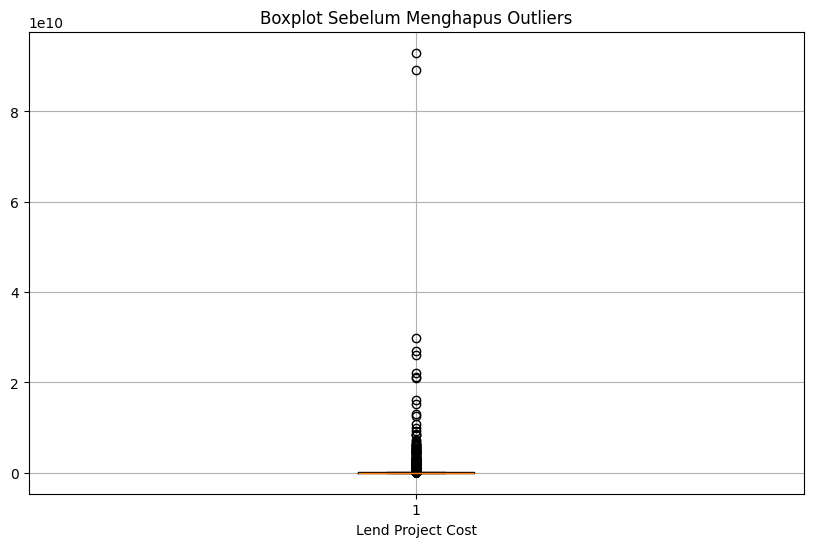

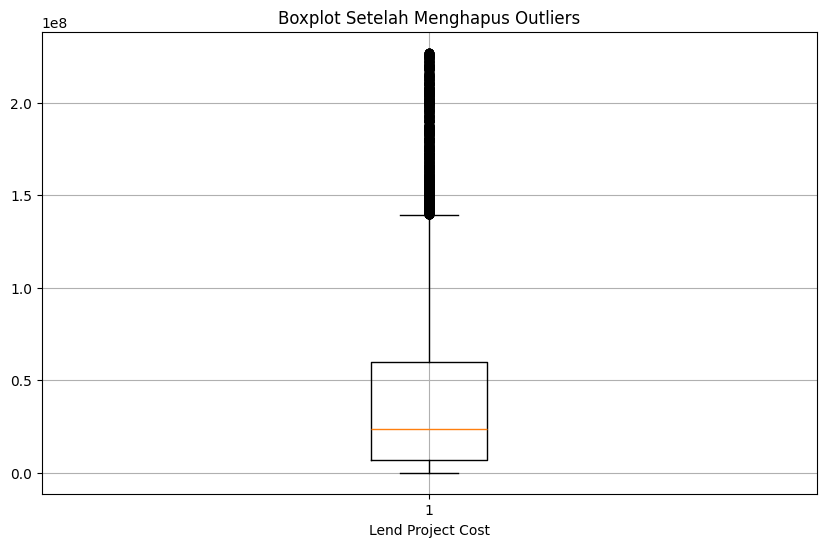

In [216]:
plt.figure(figsize=(10, 6))
plt.boxplot(project_duplicate['lendprojectcost'])
plt.title('Boxplot Sebelum Menghapus Outliers')
plt.xlabel('Lend Project Cost')
plt.grid(True)
plt.show()

Q1 = project_duplicate['lendprojectcost'].quantile(0.25)
Q3 = project_duplicate['lendprojectcost'].quantile(0.75)

IQR = Q3 - Q1

# Hitung batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus outliers
project_no_outliers = project_duplicate[(project_duplicate['lendprojectcost'] >= lower_bound) & (project_duplicate['lendprojectcost'] <= upper_bound)]

plt.figure(figsize=(10, 6))
plt.boxplot(project_no_outliers['lendprojectcost'])
plt.title('Boxplot Setelah Menghapus Outliers')
plt.xlabel('Lend Project Cost')
plt.grid(True)
plt.show()


In [217]:
dummies = pd.get_dummies(project_duplicate['status'])

In [218]:
dummies_project = project_duplicate['regionname'] 
# Gabungkan dummy variables dengan dataset duplikat
project_dummy = pd.concat([dummies_project, dummies], axis=1)

# Tampilkan DataFrame project_dummy
project_dummy

,regionname,0,Active,Closed,Dropped,Pipeline
0,Other,False,True,False,False,False
1,Africa,False,True,False,False,False
2,South Asia,False,True,False,False,False
3,South Asia,False,True,False,False,False
4,Africa,False,True,False,False,False
...,...,...,...,...,...,...
18243,Latin America and Caribbean,False,False,True,False,False
18244,Europe and Central Asia,False,False,True,False,False
18245,Europe and Central Asia,False,False,True,False,False
18246,Europe and Central Asia,False,False,True,False,False


In [219]:
project_dummy.to_csv('data_dummies/dummies_project_data.csv', index=False)

In [220]:
project_duplicate['id_country'] = project_duplicate['id'] + '_' + project_duplicate['countryname']

# Tampilkan dataset dengan kolom baru
project_duplicate.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,productlinetype,projectstatusdisplay,status,project_name,boardapprovaldate,board_approval_month,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url,id_country
0,P162228,Other,World,RE,Investment Project Financing,IN,L,Active,Active,Creating a Trade in Value-Added Database for ...,2018-06-28 00:00:00+00:00,June,0,500000.0,0,0,0,500000,http://projects.worldbank.org/P162228?lang=en,P162228_World
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,L,Active,Active,Productive Inclusion Project,2018-06-28 00:00:00+00:00,June,2023-12-31 00:00:00+00:00,200000000.0,0,200000000,200000000,0,http://projects.worldbank.org/P163962?lang=en,P163962_Democratic Republic of the Congo
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,L,Active,Active,Additional Financing for Health Sector Support...,2018-06-28 00:00:00+00:00,June,0,50000000.0,0,58330000,58330000,0,http://projects.worldbank.org/P167672?lang=en,P167672_People's Republic of Bangladesh
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,L,Active,Active,Public-Private Partnerships and Public Investm...,2018-06-27 00:00:00+00:00,June,2023-06-28 00:00:00+00:00,50000000.0,0,20000000,20000000,0,http://projects.worldbank.org/P158768?lang=en,P158768_Islamic Republic of Afghanistan
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,L,Active,Active,Nigeria For Women Project,2018-06-27 00:00:00+00:00,June,2023-05-31 00:00:00+00:00,100000000.0,0,100000000,100000000,0,http://projects.worldbank.org/P161364?lang=en,P161364_Federal Republic of Nigeria


In [221]:
scaler = MinMaxScaler()

features_to_scale = ['totalamt']

# Lakukan penskalaan pada fitur yang telah ditentukan
project_duplicate[features_to_scale] = scaler.fit_transform(project_duplicate[features_to_scale])

# Tampilkan dataset setelah penskalaan
project_duplicate

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,productlinetype,projectstatusdisplay,status,project_name,boardapprovaldate,board_approval_month,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url,id_country
0,P162228,Other,World,RE,Investment Project Financing,IN,L,Active,Active,Creating a Trade in Value-Added Database for ...,2018-06-28 00:00:00+00:00,June,0,500000.0,0,0,0.000000,500000,http://projects.worldbank.org/P162228?lang=en,P162228_World
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,L,Active,Active,Productive Inclusion Project,2018-06-28 00:00:00+00:00,June,2023-12-31 00:00:00+00:00,200000000.0,0,200000000,0.053333,0,http://projects.worldbank.org/P163962?lang=en,P163962_Democratic Republic of the Congo
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,L,Active,Active,Additional Financing for Health Sector Support...,2018-06-28 00:00:00+00:00,June,0,50000000.0,0,58330000,0.015555,0,http://projects.worldbank.org/P167672?lang=en,P167672_People's Republic of Bangladesh
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,L,Active,Active,Public-Private Partnerships and Public Investm...,2018-06-27 00:00:00+00:00,June,2023-06-28 00:00:00+00:00,50000000.0,0,20000000,0.005333,0,http://projects.worldbank.org/P158768?lang=en,P158768_Islamic Republic of Afghanistan
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,L,Active,Active,Nigeria For Women Project,2018-06-27 00:00:00+00:00,June,2023-05-31 00:00:00+00:00,100000000.0,0,100000000,0.026667,0,http://projects.worldbank.org/P161364?lang=en,P161364_Federal Republic of Nigeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,L,Closed,Closed,Power and Irrigation Project,1948-03-25 00:00:00+00:00,March,1954-12-31 00:00:00+00:00,13500000.0,13500000,0,0.003600,0,http://projects.worldbank.org/P006578/power-ir...,P006578_Republic of Chile
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,PE,Structural Adjustment Loan,AD,L,Closed,Closed,Steel Mill and Railway Project,1947-08-28 00:00:00+00:00,August,1949-03-31 00:00:00+00:00,12000000.0,12000000,0,0.003200,0,http://projects.worldbank.org/P037451/steel-mi...,P037451_Grand Duchy of Luxembourg
18245,P037362,Europe and Central Asia,Kingdom of Denmark,PE,Structural Adjustment Loan,AD,L,Closed,Closed,Post War Reconstruction Project,1947-08-22 00:00:00+00:00,August,1949-03-31 00:00:00+00:00,40000000.0,40000000,0,0.010667,0,http://projects.worldbank.org/P037362/post-war...,P037362_Kingdom of Denmark
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands,PE,Structural Adjustment Loan,AD,L,Closed,Closed,Post-war Reconstruction Project,1947-08-07 00:00:00+00:00,August,1948-06-30 00:00:00+00:00,195000000.0,195000000,0,0.052000,0,http://projects.worldbank.org/P037452/post-war...,P037452_Kingdom of the Netherlands


In [222]:
project_duplicate.to_csv('data_clean/clean_projects_data.csv', index=False)